# Step 1.2: Descriptive Analysis of Indian Music Dataset

This notebook performs comprehensive descriptive statistical analysis on the extracted audio features from the Indian music dataset.

**Dataset**: Indian Music (5 genres)
- Bollypop
- Carnatic
- Ghazal
- Semiclassical
- Sufi

## Analysis Components:
1. **Descriptive Statistics**: Mean, median, std, quartiles, percentiles, skewness
2. **Correlation Analysis**: Heatmaps showing feature relationships
3. **Genre Distribution**: Analysis of class balance across genres

Results will be saved to `results/step1.2-indian/`

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os

warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Create output directory
output_dir = '../results/step1.2-indian/'
os.makedirs(output_dir, exist_ok=True)

print("✓ Libraries imported successfully")
print(f"✓ Output directory: {output_dir}")

✓ Libraries imported successfully
✓ Output directory: ../results/step1.2-indian/


In [2]:
# Load Indian music dataset
data_dir = '../data/'
df_indian = pd.read_csv(f'{data_dir}indian_features.csv')

# Display basic info
print("=" * 80)
print("INDIAN MUSIC DATASET SUMMARY")
print("=" * 80)
print(f"\nRows: {len(df_indian):,}")
print(f"Columns: {len(df_indian.columns)}")
print(f"Memory: {df_indian.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'label' in df_indian.columns:
    print(f"\nGenres: {df_indian['label'].nunique()}")
    print("\nGenre Distribution:")
    genre_counts = df_indian['label'].value_counts()
    for genre, count in genre_counts.items():
        print(f"  {genre}: {count} tracks ({count/len(df_indian)*100:.1f}%)")

print("\n" + "=" * 80)
print("\nColumn names:")
print(df_indian.columns.tolist())

INDIAN MUSIC DATASET SUMMARY

Rows: 500
Columns: 75
Memory: 0.42 MB

Genres: 5

Genre Distribution:
  bollypop: 100 tracks (20.0%)
  carnatic: 100 tracks (20.0%)
  ghazal: 100 tracks (20.0%)
  semiclassical: 100 tracks (20.0%)
  sufi: 100 tracks (20.0%)


Column names:
['file_path', 'duration', 'sr', 'spec_centroid_mean', 'spec_rolloff_mean', 'zcr_mean', 'rms_mean', 'tempo', 'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean', 'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std', 'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std', 'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean', 'mfcc12_std', 'mfcc13_mean', 'mfcc13_std', 'mfcc14_mean', 'mfcc14_std', 'mfcc15_mean', 'mfcc15_std', 'mfcc16_mean', 'mfcc16_std', 'mfcc17_mean', 'mfcc17_std', 'mfcc18_mean', 'mfcc18_std', 'mfcc19_mean', 'mfcc19_std', 'mfcc20_mean', 'mfcc20_std', 'chroma1_mean', 'chroma1_std', 'chroma2_mean', 'chroma2_std'

## 2. Descriptive Statistics Analysis

Calculate comprehensive descriptive statistics for all numerical features including:
- Central tendency: mean, median
- Dispersion: standard deviation, variance, IQR
- Distribution shape: skewness, kurtosis
- Percentiles: 25th, 50th, 75th

In [3]:
# Calculate comprehensive descriptive statistics
def calculate_descriptive_stats(df, dataset_name):
    """
    Calculate detailed descriptive statistics for numerical features
    """
    # Exclude non-numerical columns
    exclude_cols = ['file_path', 'dataset', 'label', 'subset']
    numerical_cols = [col for col in df.columns if col not in exclude_cols]
    
    # Extract numerical data
    numerical_data = df[numerical_cols]
    
    # Calculate statistics
    stats_dict = {
        'Feature': numerical_cols,
        'Mean': numerical_data.mean().values,
        'Median': numerical_data.median().values,
        'Std': numerical_data.std().values,
        'Variance': numerical_data.var().values,
        'Min': numerical_data.min().values,
        'Max': numerical_data.max().values,
        'Q1 (25%)': numerical_data.quantile(0.25).values,
        'Q2 (50%)': numerical_data.quantile(0.50).values,
        'Q3 (75%)': numerical_data.quantile(0.75).values,
        'IQR': (numerical_data.quantile(0.75) - numerical_data.quantile(0.25)).values,
        'Skewness': numerical_data.skew().values,
        'Kurtosis': numerical_data.kurtosis().values,
        'CV (%)': (numerical_data.std() / numerical_data.mean() * 100).values
    }
    
    stats_df = pd.DataFrame(stats_dict)
    
    # Save to CSV
    stats_df.to_csv(f'{output_dir}{dataset_name}_descriptive_stats.csv', index=False)
    print(f"✓ Saved: {dataset_name}_descriptive_stats.csv")
    
    return stats_df

# Calculate statistics for Indian dataset
print("\nProcessing Indian music dataset...")
indian_stats = calculate_descriptive_stats(df_indian, 'indian')


Processing Indian music dataset...
✓ Saved: indian_descriptive_stats.csv


In [4]:
# Display summary statistics for key features
print("=" * 80)
print("INDIAN MUSIC - SUMMARY STATISTICS FOR KEY FEATURES")
print("=" * 80)

key_features = ['duration', 'tempo', 'spec_centroid_mean', 'spec_rolloff_mean', 
                'zcr_mean', 'rms_mean', 'mfcc1_mean', 'chroma1_mean']

key_stats = indian_stats[indian_stats['Feature'].isin(key_features)][['Feature', 'Mean', 'Median', 'Std', 'Skewness']]
print(key_stats.to_string(index=False))
    
print("\n" + "=" * 80)

INDIAN MUSIC - SUMMARY STATISTICS FOR KEY FEATURES
           Feature        Mean      Median         Std  Skewness
          duration   45.127687   45.000000    2.825947 19.492300
spec_centroid_mean 2059.191945 2019.090157  455.754682  0.634831
 spec_rolloff_mean 4394.569157 4344.804283 1072.699004  0.202954
          zcr_mean    0.089424    0.083279    0.029535  1.146611
          rms_mean    0.156359    0.153351    0.068938  0.361055
             tempo  121.638213  117.453835   28.907184  0.506510
        mfcc1_mean -129.498973 -123.671642   60.815790 -0.466489
      chroma1_mean    0.299690    0.288106    0.101192  0.800903



## 3. Correlation Analysis

Generate correlation heatmaps to identify relationships between features.


Generating correlation heatmap for Indian music...


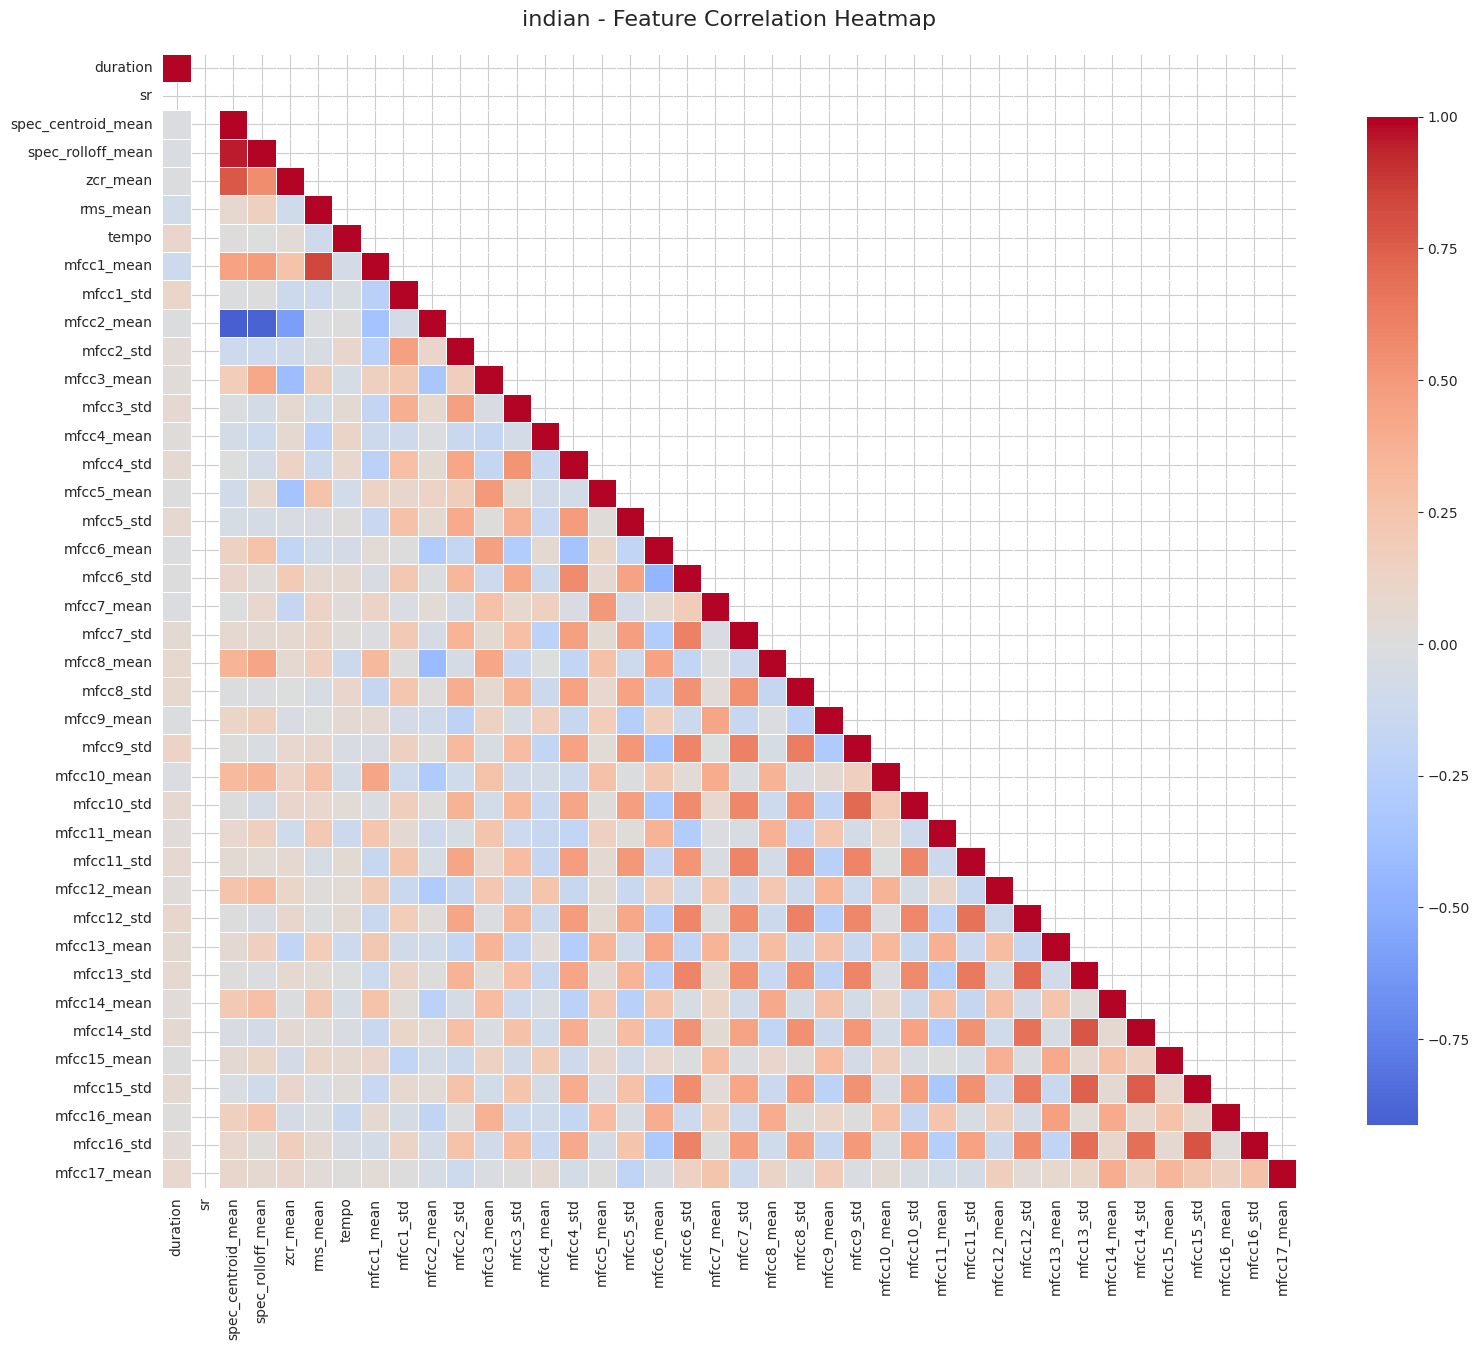

✓ Saved: indian_correlation_heatmap.png


In [5]:
# Create correlation heatmap for Indian music features
def create_correlation_heatmap(df, dataset_name, top_n=30):
    """
    Create and save correlation heatmap for top N features
    """
    # Exclude non-numerical columns
    exclude_cols = ['file_path', 'dataset', 'label', 'subset']
    numerical_cols = [col for col in df.columns if col not in exclude_cols]
    
    # Select top N features (or all if less than N)
    selected_cols = numerical_cols[:min(top_n, len(numerical_cols))]
    
    # Calculate correlation matrix
    corr_matrix = df[selected_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(16, 14))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
                center=0, square=True, linewidths=0.5,
                cbar_kws={"shrink": 0.8})
    
    plt.title(f'{dataset_name} - Feature Correlation Heatmap', fontsize=16, pad=20)
    plt.tight_layout()
    plt.savefig(f'{output_dir}{dataset_name}_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: {dataset_name}_correlation_heatmap.png")
    
    return corr_matrix

# Generate correlation heatmap for Indian music
print("\nGenerating correlation heatmap for Indian music...")
indian_corr = create_correlation_heatmap(df_indian, 'indian', top_n=40)

In [6]:
# Find highly correlated features
def find_high_correlations(corr_matrix, threshold=0.8):
    """
    Find pairs of features with correlation above threshold
    """
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    return pd.DataFrame(high_corr).sort_values('Correlation', ascending=False, key=abs)

# Find highly correlated features in Indian music
print("\n" + "=" * 80)
print("HIGHLY CORRELATED FEATURES (|r| > 0.8)")
print("=" * 80)
high_corr_indian = find_high_correlations(indian_corr, threshold=0.8)
if len(high_corr_indian) > 0:
    print(high_corr_indian.to_string(index=False))
    high_corr_indian.to_csv(f'{output_dir}indian_high_correlations.csv', index=False)
    print(f"\n✓ Saved: indian_high_correlations.csv")
else:
    print("No feature pairs with correlation > 0.8 found")
print("=" * 80)


HIGHLY CORRELATED FEATURES (|r| > 0.8)
         Feature 1         Feature 2  Correlation
spec_centroid_mean spec_rolloff_mean     0.947917
spec_centroid_mean        mfcc2_mean    -0.911866
 spec_rolloff_mean        mfcc2_mean    -0.890391
          rms_mean        mfcc1_mean     0.836563

✓ Saved: indian_high_correlations.csv


## 4. Genre Distribution Analysis

Analyze the distribution of tracks across Indian music genres.

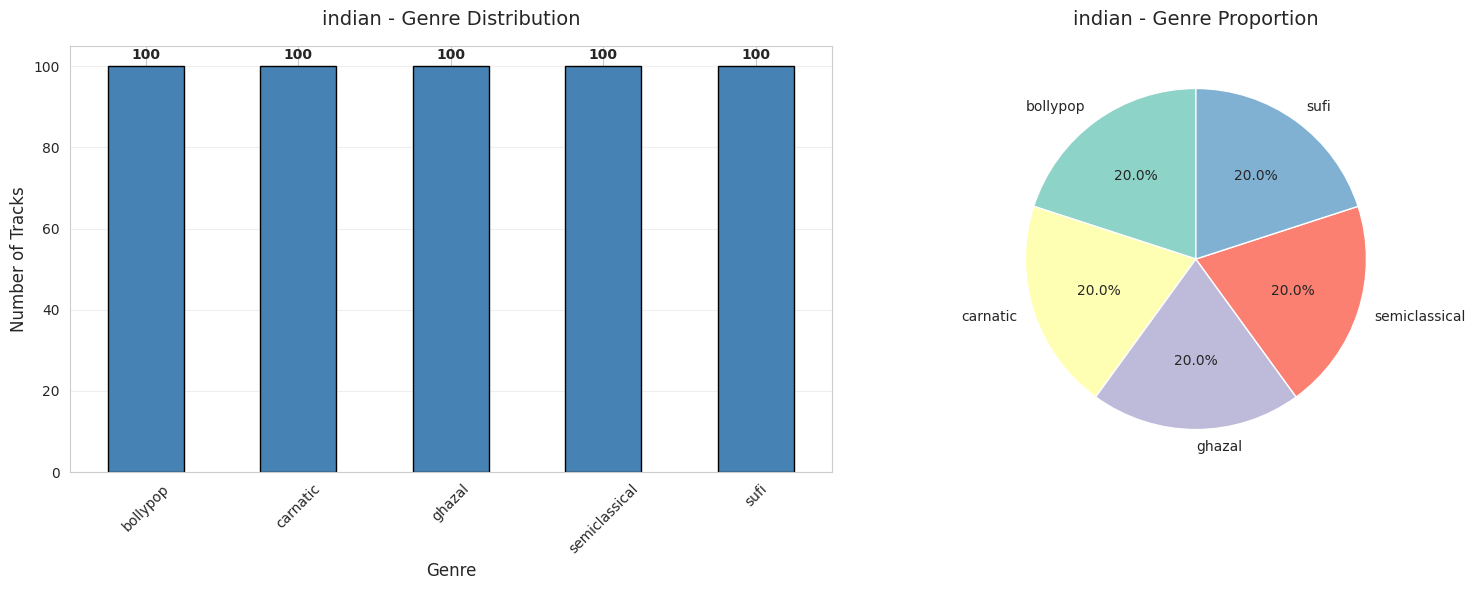


INDIAN - GENRE STATISTICS
Total tracks: 500
Number of genres: 5

Tracks per genre:
  bollypop            :   100 (20.00%)
  carnatic            :   100 (20.00%)
  ghazal              :   100 (20.00%)
  semiclassical       :   100 (20.00%)
  sufi                :   100 (20.00%)

Balance metrics:
  Most common genre: bollypop (100 tracks)
  Least common genre: sufi (100 tracks)
  Balance ratio: 1.000
  ✓ Dataset is relatively balanced

✓ Saved: indian_genre_statistics.csv


In [7]:
# Analyze genre distribution for Indian music
def analyze_genre_distribution(df, dataset_name):
    """
    Create visualizations and statistics for genre distribution
    """
    if 'label' not in df.columns:
        print(f"⚠ No labels found in {dataset_name}")
        return None
    
    # Count by genre
    genre_counts = df['label'].value_counts()
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot
    genre_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
    axes[0].set_title(f'{dataset_name} - Genre Distribution', fontsize=14, pad=15)
    axes[0].set_xlabel('Genre', fontsize=12)
    axes[0].set_ylabel('Number of Tracks', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for i, v in enumerate(genre_counts.values):
        axes[0].text(i, v + max(genre_counts) * 0.01, str(v), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Pie chart
    colors = plt.cm.Set3(range(len(genre_counts)))
    axes[1].pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%',
                startangle=90, colors=colors, textprops={'fontsize': 10})
    axes[1].set_title(f'{dataset_name} - Genre Proportion', fontsize=14, pad=15)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}{dataset_name}_genre_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Statistics
    print("\n" + "=" * 80)
    print(f"{dataset_name.upper()} - GENRE STATISTICS")
    print("=" * 80)
    print(f"Total tracks: {len(df):,}")
    print(f"Number of genres: {len(genre_counts)}")
    print(f"\nTracks per genre:")
    for genre, count in genre_counts.items():
        pct = count / len(df) * 100
        print(f"  {genre:20s}: {count:5d} ({pct:5.2f}%)")
    
    # Balance metrics
    max_count = genre_counts.max()
    min_count = genre_counts.min()
    balance_ratio = min_count / max_count
    
    print(f"\nBalance metrics:")
    print(f"  Most common genre: {genre_counts.index[0]} ({max_count} tracks)")
    print(f"  Least common genre: {genre_counts.index[-1]} ({min_count} tracks)")
    print(f"  Balance ratio: {balance_ratio:.3f}")
    
    if balance_ratio < 0.5:
        print(f"  ⚠ Warning: Significant class imbalance detected!")
    else:
        print(f"  ✓ Dataset is relatively balanced")
    
    print("=" * 80)
    
    # Save statistics
    genre_stats = pd.DataFrame({
        'Genre': genre_counts.index,
        'Count': genre_counts.values,
        'Percentage': (genre_counts.values / len(df) * 100).round(2)
    })
    genre_stats.to_csv(f'{output_dir}{dataset_name}_genre_statistics.csv', index=False)
    print(f"\n✓ Saved: {dataset_name}_genre_statistics.csv")
    
    return genre_counts

# Analyze Indian music genres
indian_genres = analyze_genre_distribution(df_indian, 'indian')

## 5. Feature Distribution by Genre

Visualize how different audio features vary across Indian music genres.


Generating feature distribution plots for Indian music...


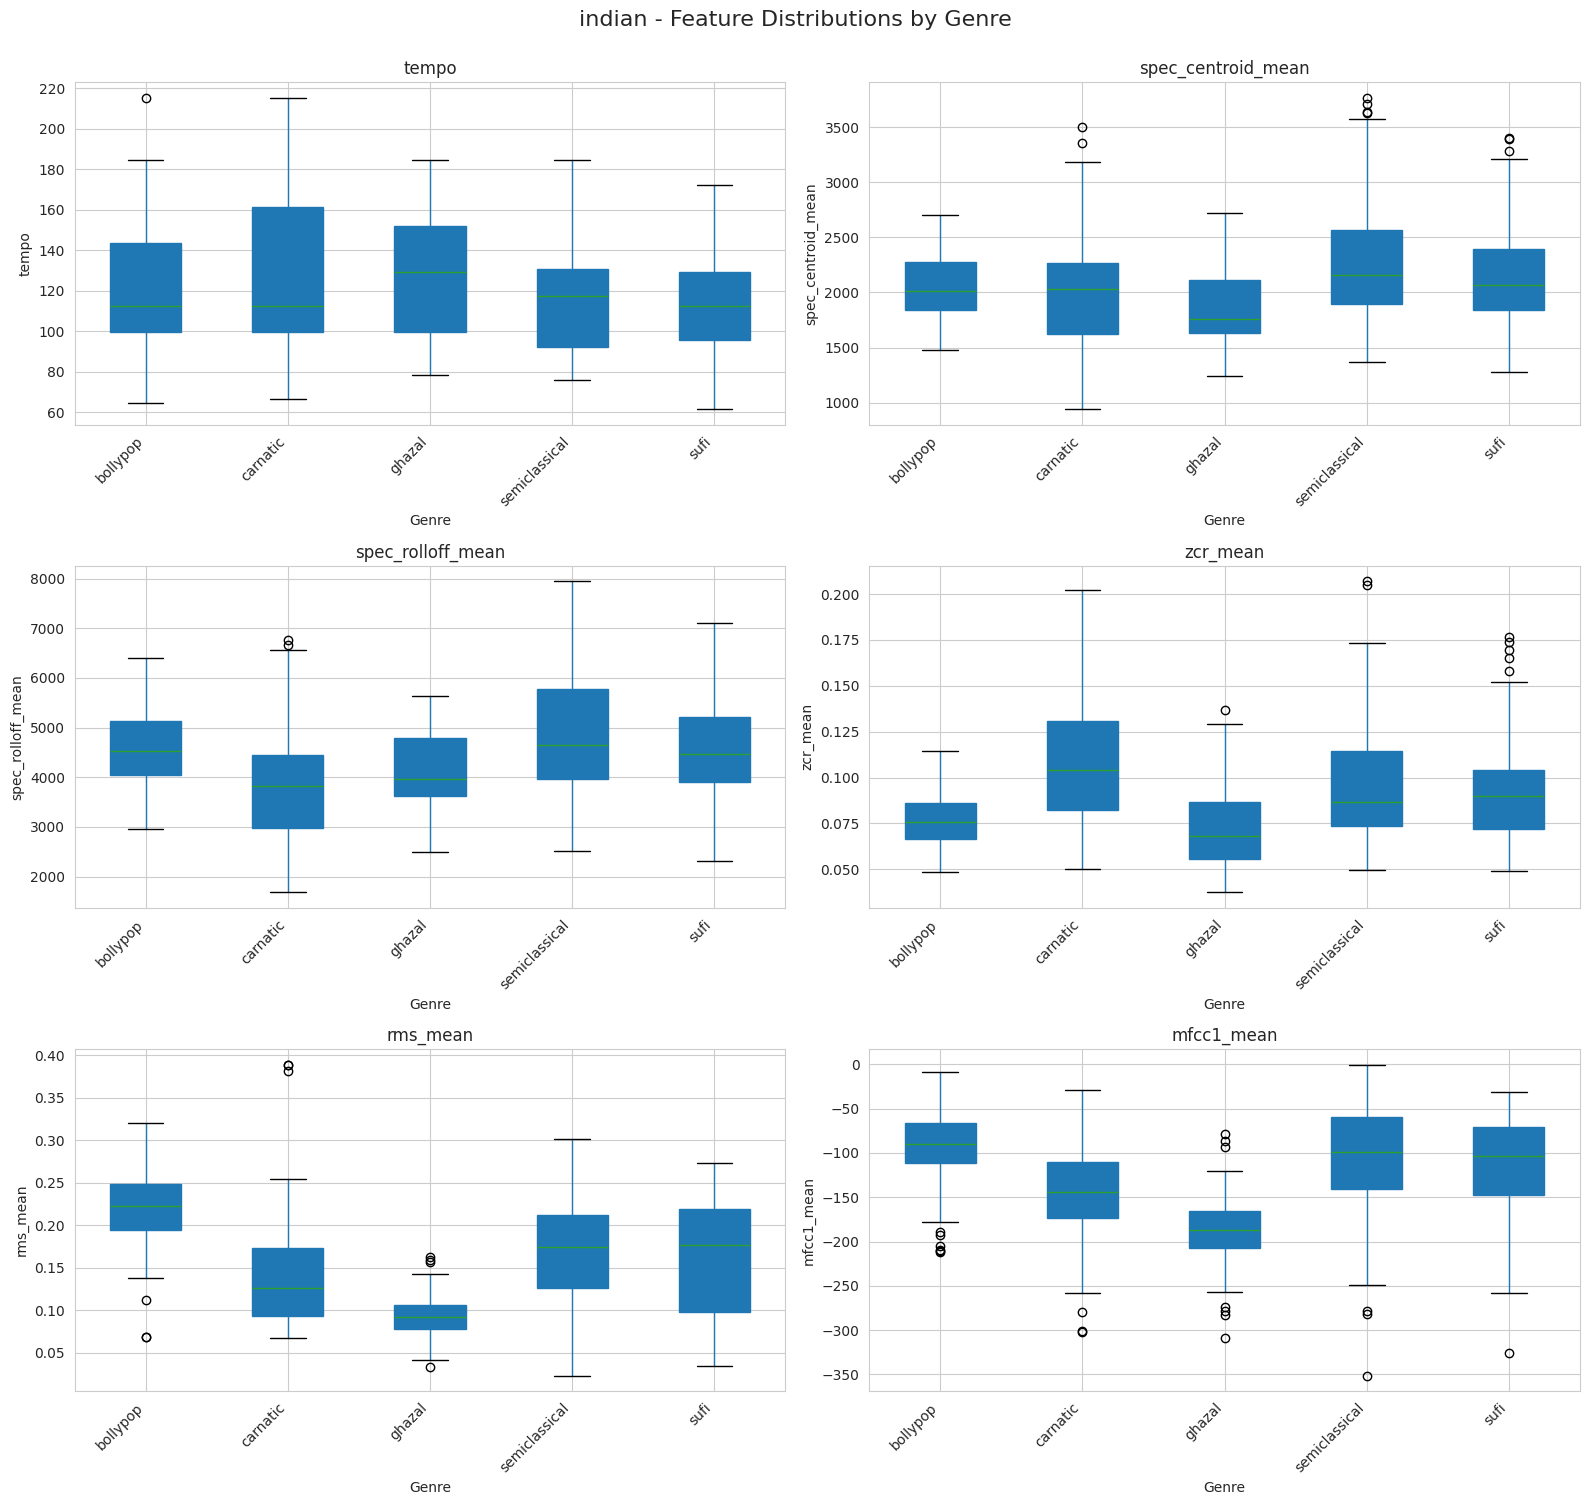

✓ Saved: indian_feature_by_genre.png


In [8]:
# Visualize feature distributions by genre
def plot_feature_by_genre(df, dataset_name, features_to_plot):
    """
    Create box plots showing feature distributions across genres
    """
    if 'label' not in df.columns:
        print(f"⚠ No labels in {dataset_name}")
        return
    
    n_features = len(features_to_plot)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, feature in enumerate(features_to_plot):
        if feature in df.columns:
            ax = axes[idx]
            
            # Create box plot
            df.boxplot(column=feature, by='label', ax=ax, patch_artist=True)
            ax.set_title(f'{feature}', fontsize=12)
            ax.set_xlabel('Genre', fontsize=10)
            ax.set_ylabel(feature, fontsize=10)
            ax.tick_params(axis='x', rotation=45)
            plt.sca(ax)
            plt.xticks(rotation=45, ha='right')
            
            # Remove the automatic title that pandas adds
            ax.get_figure().suptitle('')
    
    # Hide unused subplots
    for idx in range(len(features_to_plot), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'{dataset_name} - Feature Distributions by Genre', 
                 fontsize=16, y=1.00)
    plt.tight_layout()
    plt.savefig(f'{output_dir}{dataset_name}_feature_by_genre.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: {dataset_name}_feature_by_genre.png")

# Key features to visualize
key_features = ['tempo', 'spec_centroid_mean', 'spec_rolloff_mean', 
                'zcr_mean', 'rms_mean', 'mfcc1_mean']

print("\nGenerating feature distribution plots for Indian music...")
plot_feature_by_genre(df_indian, 'indian', key_features)

## 6. Summary Report

Generate a comprehensive summary of the descriptive analysis.

In [9]:
# Generate comprehensive summary report
def generate_summary_report():
    """
    Create a text summary of the descriptive analysis
    """
    report = []
    report.append("=" * 80)
    report.append("INDIAN MUSIC DATASET - DESCRIPTIVE ANALYSIS SUMMARY")
    report.append("=" * 80)
    report.append("")
    
    # Dataset overview
    report.append("1. DATASET OVERVIEW")
    report.append("-" * 80)
    report.append(f"Total tracks: {len(df_indian):,}")
    report.append(f"Number of features: {len(df_indian.columns) - 4}")  # Exclude metadata columns
    report.append(f"Number of genres: {df_indian['label'].nunique()}")
    report.append("")
    
    # Genre distribution
    report.append("2. GENRE DISTRIBUTION")
    report.append("-" * 80)
    genre_counts = df_indian['label'].value_counts()
    for genre, count in genre_counts.items():
        pct = count / len(df_indian) * 100
        report.append(f"  {genre:20s}: {count:5d} tracks ({pct:5.2f}%)")
    report.append("")
    
    # Key statistics
    report.append("3. KEY FEATURE STATISTICS")
    report.append("-" * 80)
    key_features = ['duration', 'tempo', 'spec_centroid_mean', 'spec_rolloff_mean', 
                    'zcr_mean', 'rms_mean']
    
    for feature in key_features:
        if feature in df_indian.columns:
            values = df_indian[feature].dropna()
            report.append(f"\n{feature}:")
            report.append(f"  Mean: {values.mean():.4f}")
            report.append(f"  Median: {values.median():.4f}")
            report.append(f"  Std: {values.std():.4f}")
            report.append(f"  Range: [{values.min():.4f}, {values.max():.4f}]")
    
    report.append("")
    
    # Correlation insights
    report.append("4. CORRELATION INSIGHTS")
    report.append("-" * 80)
    high_corr = find_high_correlations(indian_corr, threshold=0.8)
    if len(high_corr) > 0:
        report.append(f"Found {len(high_corr)} feature pairs with |r| > 0.8")
        report.append("Top 5 correlations:")
        for idx, row in high_corr.head(5).iterrows():
            report.append(f"  {row['Feature 1']:30s} <-> {row['Feature 2']:30s}: {row['Correlation']:6.3f}")
    else:
        report.append("No highly correlated feature pairs (|r| > 0.8) found")
    
    report.append("")
    
    # Data quality
    report.append("5. DATA QUALITY CHECK")
    report.append("-" * 80)
    missing_counts = df_indian.isnull().sum()
    missing_features = missing_counts[missing_counts > 0]
    
    if len(missing_features) > 0:
        report.append(f"Features with missing values: {len(missing_features)}")
        for feature, count in missing_features.items():
            pct = count / len(df_indian) * 100
            report.append(f"  {feature}: {count} ({pct:.2f}%)")
    else:
        report.append("✓ No missing values found")
    
    report.append("")
    
    # Files generated
    report.append("6. GENERATED FILES")
    report.append("-" * 80)
    report.append(f"Output directory: {output_dir}")
    report.append("Files created:")
    if os.path.exists(output_dir):
        files = sorted([f for f in os.listdir(output_dir) if f.startswith('indian')])
        for f in files:
            report.append(f"  - {f}")
    
    report.append("")
    report.append("=" * 80)
    report.append("END OF SUMMARY REPORT")
    report.append("=" * 80)
    
    # Print and save report
    report_text = "\n".join(report)
    print(report_text)
    
    with open(f'{output_dir}indian_analysis_summary.txt', 'w') as f:
        f.write(report_text)
    
    print(f"\n✓ Saved: indian_analysis_summary.txt")

# Generate summary report
generate_summary_report()

INDIAN MUSIC DATASET - DESCRIPTIVE ANALYSIS SUMMARY

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Total tracks: 500
Number of features: 71
Number of genres: 5

2. GENRE DISTRIBUTION
--------------------------------------------------------------------------------
  bollypop            :   100 tracks (20.00%)
  carnatic            :   100 tracks (20.00%)
  ghazal              :   100 tracks (20.00%)
  semiclassical       :   100 tracks (20.00%)
  sufi                :   100 tracks (20.00%)

3. KEY FEATURE STATISTICS
--------------------------------------------------------------------------------

duration:
  Mean: 45.1277
  Median: 45.0000
  Std: 2.8259
  Range: [40.0000, 105.0000]

tempo:
  Mean: 121.6382
  Median: 117.4538
  Std: 28.9072
  Range: [61.5234, 215.3320]

spec_centroid_mean:
  Mean: 2059.1919
  Median: 2019.0902
  Std: 455.7547
  Range: [942.4791, 3765.8591]

spec_rolloff_mean:
  Mean: 4394.5692
  Median: 4344.8043
  S